# Lab 8
* **Name**: Utkarsh Prakash

## Title
Demostrate the working principle of convolution neural networks.

## Objective
* To train a CNN for the Fashion MNIST dataset.
* To observe the information learned by each convolutional layer with different filters.
* To observe the vanishing/exploding gradient problem with increase in number of layers.

## Hypothesis:
* The lower layers of the CNN should learn basic features wheareas later layers of the network should learn high level features.
* As we increase the number of layers, the network should suffer from the problem of vanishing gradients when the activation function is sigmoid and weights are initialized randomly according to normal distribution.

## Experimental Description:
1. **Data Generation:**

    We use Fashion MNIST data for training and testing.
    The Fashion MNIST dataset consists of following 10 classes:
    * T-shirt/top
    * Trouser
    * Pullover
    * Dress
    * Coat
    * Sandal
    * Shirt
    * Sneaker
    * Bag
    * Ankle Boot

2. **Neural Network Architecture:**

![CNN Architecture](tmp/Capture.png)

3. **Training and Cross Validation:**
    
    For training we use 55,000 images and for cross-validation we use 5,000 images. We use Keras Early Stopping Callback to stop the training if there is no improvement over validation loss for 10 consecutive epochs.
    

4. **Testing:**
    For testing we use 5,000 images.


## Implementation
### Part1: Training CNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import pandas as pd

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
#changing the working directory
%cd /content/gdrive/MyDrive/NNDL_Lab
#Check the present working directory using pwd command

/content/gdrive/My Drive/NNDL_Lab


In [2]:
# Loading Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = np.expand_dims(X_train_full, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Normalizing the images
X_train_full, X_test = X_train_full/255.0, X_test/255.0

# Creating Cross-validation data
X_val, X_train = X_train_full[:5000], X_train_full[5000:]
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((55000, 28, 28, 1),
 (55000,),
 (5000, 28, 28, 1),
 (5000,),
 (10000, 28, 28, 1),
 (10000,))

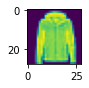

In [3]:
# An image from Training Data
plt.figure(figsize=(1, 1))
plt.imshow((X_train*255.0)[0, :, :, 0])

In [4]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),      # Convolution Layer
            tf.keras.layers.MaxPool2D(2, 2),                                                                # Max Pooling Layer    
            tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),                               # Convolution Layer      
            tf.keras.layers.MaxPool2D(2, 2),                                                                # Max Pooling Layer
            tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),                              # Convolution Layer    
            tf.keras.layers.MaxPool2D(2, 2),                                                                # Max Pooling Layer
            tf.keras.layers.Flatten(),                                                                      # Flatten Layer
            tf.keras.layers.Dense(128, activation='relu'),                                                  # Dense Layer
            tf.keras.layers.Dense(10, activation='softmax')                                                 # Dense Layer
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [5]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    '''
        Callback for printing the ratio of Validation loss and Training loss.
    '''

    def on_epoch_end(self, epoch, logs):
        print("\nRatio of Validation loss to Training loss = {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [6]:
# Instantiating callbacks
print_callback = PrintValTrainRatioCallback()
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [8]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_val, y_val),
          callbacks= [print_callback, early_stopping_callback])

Epoch 1/50
1719/1719 [==============================] - 39s 4ms/step - loss: 0.7789 - accuracy: 0.7170 - val_loss: 0.4023 - val_accuracy: 0.8520

Ratio of Validation loss to Training loss = 0.71
Epoch 2/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3977 - accuracy: 0.8522 - val_loss: 0.3430 - val_accuracy: 0.8726

Ratio of Validation loss to Training loss = 0.90
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3294 - accuracy: 0.8769 - val_loss: 0.3123 - val_accuracy: 0.8840

Ratio of Validation loss to Training loss = 0.96
Epoch 4/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2885 - accuracy: 0.8925 - val_loss: 0.2951 - val_accuracy: 0.8866

Ratio of Validation loss to Training loss = 1.02
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2593 - accuracy: 0.9012 - val_loss: 0.2867 - val_accuracy: 0.8910

Ratio of Validation loss to Training loss = 1.11
Epoch 6/50
1719/1719 [=======

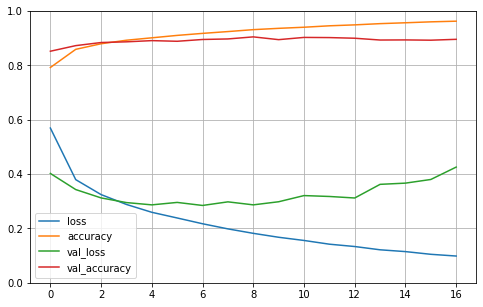

In [9]:
# Plotting accuracy, loss vs Epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to[0-1]
plt.show()

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

### Visualizing the Convolutions

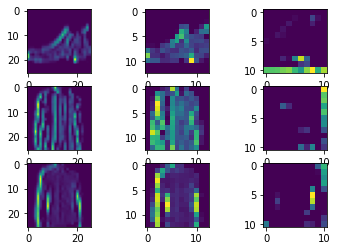

In [20]:
f, axarr = plt.subplots(3,3)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 8

for x in range(0,3):

    f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER])
    axarr[0,x].grid(False)
    f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER])
    axarr[1,x].grid(False)
    f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER])
    axarr[2,x].grid(False)

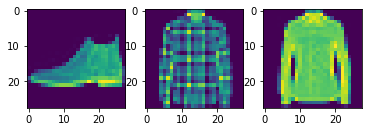

In [17]:
# Original images
f, axarr = plt.subplots(1,3)
axarr[0].imshow((X_test*255.0)[FIRST_IMAGE, :, :, 0])
axarr[0].grid(False)
axarr[1].imshow((X_test*255.0)[SECOND_IMAGE, :, :, 0])
axarr[1].grid(False)
axarr[2].imshow((X_test*255.0)[THIRD_IMAGE, :, :, 0])
axarr[2].grid(False)

### Visualizing the learned filters

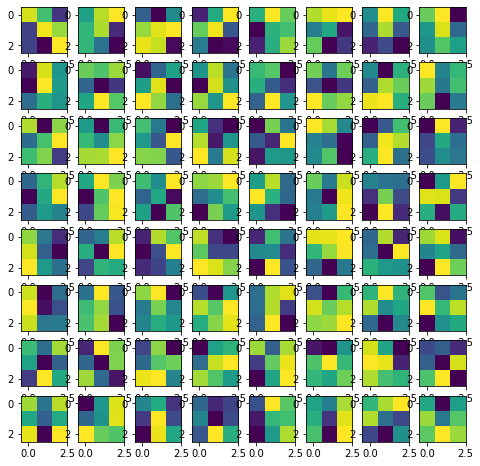

In [38]:
f, axarr = plt.subplots(8,8, figsize=(8, 8))

first_filter = model.get_weights()[0]

for i in range(first_filter.shape[-1]):
    axarr[i//8, i%8].imshow(first_filter[:, :, 0, i]*255.0)
    axarr[i//8, i%8].grid(False)

In [35]:
# Saving the model
model.save("Fashion_MNIST.h5")

In [37]:
model = tf.keras.models.load_model("Fashion_MNIST.h5")

### Part2: Vanishing and Exploding Gradients

In [39]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='sigmoid', input_shape=(28, 28, 1), kernel_initializer='random_normal', padding='same'),
            tf.keras.layers.MaxPool2D(2, 1),
            tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='sigmoid', kernel_initializer='random_normal', padding='same'),
            tf.keras.layers.MaxPool2D(2, 1),
            tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='sigmoid', kernel_initializer='random_normal'),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='sigmoid', kernel_initializer='random_normal'),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='sigmoid', kernel_initializer='random_normal'),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu', kernel_initializer='random_normal'),
            tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal')
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)      

In [41]:
# Prepare a dataset.
dataset = tf.data.Dataset.from_tensor_slices(
              (X_train.astype("float32"), y_train)
)
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a logistic loss function that expects integer targets.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):

    # Open a GradientTape.
    with tf.GradientTape() as tape:

        # Forward pass.
        logits = model(x)

        # Loss value for this batch.
        loss = loss_fn(y, logits)

    # Get gradients of weights wrt the loss.
    gradients = tape.gradient(loss, model.trainable_weights)

    # Update the weights of our linear layer.
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    # Logging.
    if step % 100 == 0:
        print("Step:", step, "Loss:", float(loss))

Step: 0 Loss: 2.3113632202148438
Step: 100 Loss: 2.299731492996216
Step: 200 Loss: 2.2969775199890137
Step: 300 Loss: 2.3152596950531006
Step: 400 Loss: 2.293072462081909
Step: 500 Loss: 2.317242383956909
Step: 600 Loss: 2.304840087890625
Step: 700 Loss: 2.296999454498291
Step: 800 Loss: 2.305791139602661


In [45]:
for i in range(0, len(gradients), 2):
    print(str(i) + " Layer gradients: Max value of gradient: " + 
          str(np.amax(gradients[i].numpy())) + " Min value of gradient: " +
          str(np.amin(gradients[i].numpy())))

0 Layer gradients: Max value of gradient: 2.7520047e-05 Min value of gradient: -1.6482101e-05
2 Layer gradients: Max value of gradient: 5.2769068e-05 Min value of gradient: -6.700276e-05
4 Layer gradients: Max value of gradient: 0.00018626984 Min value of gradient: -0.00025777498
6 Layer gradients: Max value of gradient: 0.00070067745 Min value of gradient: -0.0009893297
8 Layer gradients: Max value of gradient: 0.0024703122 Min value of gradient: -0.0017338924
10 Layer gradients: Max value of gradient: 0.020174408 Min value of gradient: -0.024770746
12 Layer gradients: Max value of gradient: 0.073452085 Min value of gradient: -0.10714928


## Observations and Conclusions
* We observe that the initial layers of the CNN learn basic features such as horizontal edges, vertical edges, edges at 45 degress etc.
* The later layers of the CNN learn advanced features such as background removal etc.
* With the activation function as sigmoid and weight being initialised randomly using normal distribution, we observe that as we increase the number of layers in the network, the network suffers from the problem of vanishing gradients.
* The problem of vanishing gradients can be solved using ReLU activation function and initialsing weight using uniform distribution as described in Glorot et. al., 2010.

## References
1. Deep Learning by Ian Goodfellow, Yoshua Bengio and Aaron Courville, 2016
2. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurelien Geron, 2019
3. http://alexlenail.me/NN-SVG/LeNet.html for plotting the CNN architecture.